In [6]:
import importlib

In [21]:
None.__str__()

'None'

In [27]:
a = NoFig()

In [30]:
isinstance(a, NoFig)

True

In [26]:
class NoFig():
    pass

In [17]:
a = type(plt.figure())

<Figure size 1008x504 with 0 Axes>

In [9]:
importlib.util.find_spec("ajsid")

# Clean folder

In [1]:
# To view how tidypath creates the files and directory, we first delete the existing ones.
from pathlib import Path
import shutil 

for directory in ["data", "figs"]:
    if Path(directory).exists():
        shutil.rmtree(directory)

# Proyect structure

In [2]:
# Check at the end the structure that is created
# Check the module analysis.variable1.measurement1 to see the syntax
from analysis.variable1 import measurement1
import os 
def list_files(startpath):
    """https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python"""
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [3]:
# Initial situation: No 'data' or 'figs' directory. 
os.listdir(".")

['.ipynb_checkpoints', 'Example.ipynb', 'analysis']

In [4]:
# Computing and storing data
# slow_computation encodes "x+z+kwargs" into the filename.
X = measurement1.slow_computation(1, 0, z=10, extra="b", other="some")

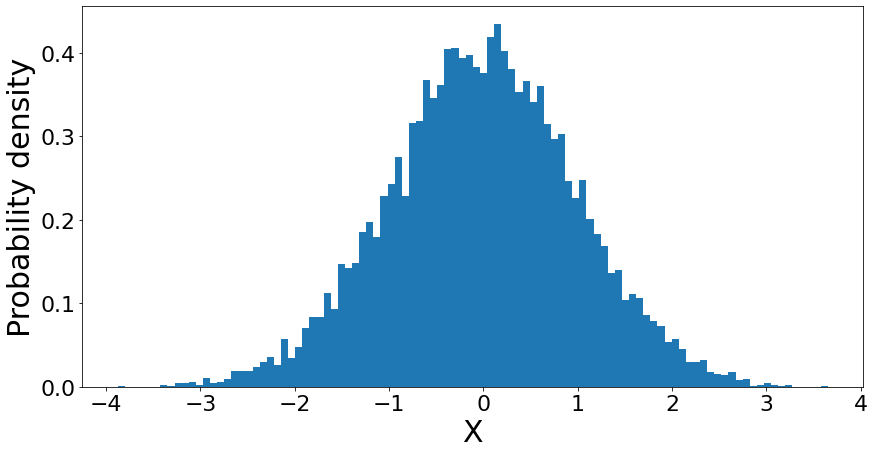

In [5]:
# Figure plot: 
# 1. Call func for data to plot. If associated file exists => load cached file.
#                                else                      => compute it and store it.
# 2. Plot figure and store it.
measurement1.plot_slow_computation(1, 0, z=10, extra="b", return_fig=True) 

In [6]:
# Verify files stored at the correct location
list_files("data")
list_files("figs") # notice keyword-only argument z is included in kwargs (also pos_or_kwd with a default option)

data/
    variable1/
        measurement1/
            slow_computation/
                extra-b_x-1_z-10_.lzma
                extra-b_other-some_x-1_z-10_.lzma
figs/
    variable1/
        measurement1/
            plot_slow_computation/
                extra-b_z-10_.png


In [7]:
from inspect import signature
# Verify extra arguments included in the function. Compare the signatures with the ones defined at analysis/variable1/measurement1.py
# savedata  =>   ('overwrite', 'keys', 'save') 
# savefig   =>   ('overwrite', 'keys', 'save', 'return_fig')
signature(measurement1.slow_computation), signature(measurement1.plot_slow_computation)

(<Signature (x, y, *args, z=1, overwrite=False, keys='x+z+kwargs', save=True, **kwargs)>,
 <Signature (*args, overwrite=True, keys='kwargs', save=True, return_fig=False, **kwargs)>)

# Adding/deleting/modifying args in filenames

In [8]:
from tidypath import add_arg, delete_arg, modify_arg

pdir = "data/variable1/measurement1/slow_computation/"
os.listdir(pdir)

['extra-b_x-1_z-10_.lzma', 'extra-b_other-some_x-1_z-10_.lzma']

In [9]:
add_arg(measurement1.slow_computation, arg1="some", arg2=None)

Filename change example:
'extra-b_x-1_z-10_.lzma' -> 'arg1-some_extra-b_x-1_z-10_.lzma'
Proceed? [y/n]y
Filename change example:
'arg1-some_extra-b_other-some_x-1_z-10_.lzma' -> 'arg1-some_arg2-None_extra-b_other-some_x-1_z-10_.lzma'
Proceed? [y/n]y


In [10]:
os.listdir(pdir)

['arg1-some_arg2-None_extra-b_other-some_x-1_z-10_.lzma',
 'arg1-some_arg2-None_extra-b_x-1_z-10_.lzma']

In [11]:
delete_arg(measurement1.slow_computation, arg=["arg2", "arg1"])

Filename change example:
'arg1-some_arg2-None_extra-b_other-some_x-1_z-10_.lzma' -> 'arg2-None_extra-b_other-some_x-1_z-10_.lzma'
Proceed? [y/n]y
Filename change example:
'arg2-None_extra-b_x-1_z-10_.lzma' -> 'extra-b_x-1_z-10_.lzma'
Proceed? [y/n]y


In [12]:
os.listdir(pdir)

['extra-b_x-1_z-10_.lzma', 'extra-b_other-some_x-1_z-10_.lzma']

In [13]:
modify_arg(measurement1.slow_computation, x=["1st", "2nd"])

Filename change example:
'extra-b_x-1_z-10_.lzma' -> 'extra-b_x-1st-2nd_z-10_.lzma'
Proceed? [y/n]y


In [14]:
os.listdir(pdir)

['extra-b_other-some_x-1st-2nd_z-10_.lzma', 'extra-b_x-1st-2nd_z-10_.lzma']